<a href="https://colab.research.google.com/github/chosh84/ml_study/blob/main/NNFS/notebooks/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nnfs

In [ ]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

import os
import urllib
import urllib.request
if not os.path.isfile(FILE):
  print(f'Downloading {URL} and saving as {FILE}...') 
  urllib.request.urlretrieve(URL, FILE)

from zipfile import ZipFile
print('Unzipping images...')
with ZipFile(FILE) as zip_images:
  zip_images.extractall(FOLDER)



Unzipping images...


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  49 135 182 150  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 255 220 21

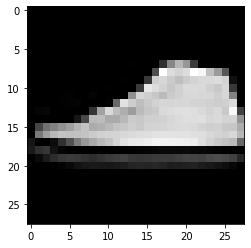

In [ ]:
import cv2
# 이미지 데이터를 3color로 해서 array로 바꿈
image_data = cv2.imread('fashion_mnist_images/train/7/0002.png',
                          cv2.IMREAD_UNCHANGED)
import numpy as np 
np.set_printoptions(linewidth=200)
print(image_data)

import matplotlib.pyplot as plt
plt.imshow(image_data, cmap='gray')
plt.show()

In [ ]:
import numpy as np
import cv2
import os

# Loads a MNIST dataset
def load_mnist_dataset(dataset, path):
  # Scan all the directories and create a list of labels
  labels = os.listdir(os.path.join(path, dataset))
  
  # Create lists for samples and labels
  X = [] 
  y = []
  
  # For each label folder
  for label in labels:
    # And for each image in given folder
    for file in os.listdir(os.path.join(path, dataset, label)):
      # Read the image
      image = cv2.imread(os.path.join(path, dataset, label, file),
                         cv2.IMREAD_UNCHANGED)
      # And append it and a label to the lists
      X.append(image)
      y.append(label)
      
  # Convert the data to proper numpy arrays and return
  return np.array(X), np.array(y).astype('uint8')
  
# MNIST dataset (train + test)
def create_data_mnist(path):
  # Load both sets separately
  X, y = load_mnist_dataset('train', path)
  X_test, y_test = load_mnist_dataset('test', path)
  
  # And return all the data
  return X, y, X_test, y_test

-1.0 1.0
(60000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]
[ 3048 19563 58303  8870 40228 31488 21860 56864   845 25770]


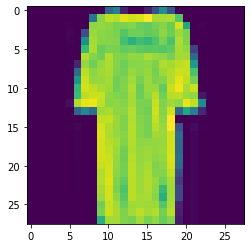

3


In [ ]:
# Create dataset
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

# Scale features
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

# Reshape to vectors
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# get keys
keys = np.array(range(X.shape[0]))
print(keys[:10])

import nnfs

nnfs.init()

# shuffle the keys 
np.random.shuffle(keys)
print(keys[:10])

X = X[keys]
y = y[keys]

import matplotlib.pyplot as plt
plt.imshow((X[10].reshape(28, 28)))  # Reshape as image is a vector already
plt.show()

print(y[10])